In [476]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [477]:
# Read the data
dataset = pd.read_csv('xAPI-Edu-Data.csv')

# check data
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [478]:
# check the size for the dataset
dataset.shape

(480, 17)

In [479]:
#check if null values is in dataset or not.....
dataset.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [480]:
# see the column in the dataset
column = list(dataset.columns)
print(f'list is: \n{column} \nso there is : {len(column)-1} features in the dataset') # -1 because of the last column is the target

list is: 
['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'] 
so there is : 16 features in the dataset


In [481]:
# to see the value of each column
def see_feature_values():
    for i in column:
        print(f'{i} >> {dataset[str(i)].unique()}')
        print('-----------------------------')
see_feature_values()

gender >> ['M' 'F']
-----------------------------
NationalITy >> ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
-----------------------------
PlaceofBirth >> ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
-----------------------------
StageID >> ['lowerlevel' 'MiddleSchool' 'HighSchool']
-----------------------------
GradeID >> ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
-----------------------------
SectionID >> ['A' 'B' 'C']
-----------------------------
Topic >> ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
-----------------------------
Semester >> ['F' 'S']
-----------------------------
Relation >> ['Father' 'Mum']
-----------------------------
raisedhands >> [ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   

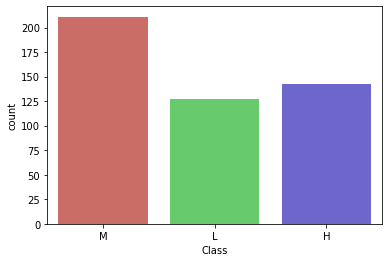

In [482]:
# visulize the dataset and see the value of the class
sns.countplot(x='Class',data=dataset, palette='hls')
plt.show()
#plt.savefig('count_plot')

In [483]:
# features train
features = ['gender','StageID','GradeID','Topic','raisedhands','VisITedResources', 'AnnouncementsView',
            'Discussion','StudentAbsenceDays']

In [484]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Convert column Topic and studentAbsenceDays only into numeric value  

In [485]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset['gender'] = label_encoder.fit_transform(dataset['gender'])
dataset['StageID'] = label_encoder.fit_transform(dataset['StageID'])
dataset['GradeID'] = label_encoder.fit_transform(dataset['GradeID'])
dataset['Topic'] = label_encoder.fit_transform(dataset['Topic'])
dataset['StudentAbsenceDays'] = label_encoder.fit_transform(dataset['StudentAbsenceDays'])

In [486]:
# check the value of features after convert the dataset into readable ML format ( which is numeric)
dataset.head()

# if want to see all the values of each column after convert string into int, call see_feature_values() below 
# see_feature_values()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,2,1,A,7,F,Father,15,16,2,20,Yes,Good,1,M
1,1,KW,KuwaIT,2,1,A,7,F,Father,20,20,3,25,Yes,Good,1,M
2,1,KW,KuwaIT,2,1,A,7,F,Father,10,7,0,30,No,Bad,0,L
3,1,KW,KuwaIT,2,1,A,7,F,Father,30,25,5,35,No,Bad,0,L
4,1,KW,KuwaIT,2,1,A,7,F,Father,40,50,12,50,No,Bad,0,M


## split

In [487]:
# split features
X = dataset[features] 
X

,gender,StageID,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,1,2,1,7,15,16,2,20,1
1,1,2,1,7,20,20,3,25,1
2,1,2,1,7,10,7,0,30,0
3,1,2,1,7,30,25,5,35,0
4,1,2,1,7,40,50,12,50,0
...,...,...,...,...,...,...,...,...,...
475,0,1,5,2,5,4,5,8,0
476,0,1,5,5,50,77,14,28,1
477,0,1,5,5,55,74,25,29,1
478,0,1,5,6,30,17,14,57,0


In [488]:
# split target
y = dataset.iloc[:, -1].values 
print(y)

['M' 'M' 'L' 'L' 'M' 'M' 'L' 'M' 'M' 'M' 'H' 'M' 'L' 'L' 'H' 'M' 'M' 'M'
 'M' 'H' 'M' 'M' 'M' 'L' 'L' 'L' 'M' 'L' 'M' 'M' 'H' 'L' 'L' 'L' 'L' 'L'
 'L' 'M' 'L' 'M' 'L' 'M' 'L' 'M' 'M' 'L' 'L' 'H' 'H' 'M' 'L' 'L' 'M' 'H'
 'L' 'L' 'L' 'L' 'M' 'M' 'L' 'M' 'H' 'M' 'L' 'L' 'M' 'H' 'H' 'M' 'L' 'M'
 'L' 'M' 'L' 'M' 'M' 'M' 'L' 'H' 'L' 'L' 'L' 'M' 'H' 'L' 'H' 'L' 'L' 'L'
 'L' 'H' 'H' 'H' 'L' 'H' 'H' 'M' 'M' 'M' 'M' 'H' 'L' 'L' 'M' 'L' 'M' 'H'
 'M' 'M' 'H' 'M' 'L' 'L' 'L' 'L' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'M' 'L' 'L'
 'M' 'L' 'L' 'L' 'L' 'M' 'L' 'L' 'H' 'H' 'H' 'M' 'H' 'M' 'L' 'L' 'M' 'H'
 'L' 'M' 'H' 'M' 'M' 'H' 'H' 'M' 'H' 'L' 'M' 'H' 'M' 'M' 'L' 'M' 'H' 'M'
 'H' 'M' 'M' 'H' 'M' 'H' 'H' 'M' 'H' 'M' 'L' 'L' 'M' 'L' 'H' 'M' 'H' 'M'
 'H' 'L' 'H' 'M' 'L' 'H' 'M' 'M' 'H' 'M' 'L' 'L' 'M' 'M' 'M' 'M' 'H' 'H'
 'L' 'M' 'H' 'H' 'M' 'M' 'L' 'H' 'M' 'M' 'M' 'M' 'H' 'M' 'H' 'L' 'L' 'L'
 'M' 'M' 'H' 'M' 'M' 'M' 'M' 'H' 'H' 'M' 'L' 'L' 'H' 'L' 'M' 'L' 'M' 'M'
 'M' 'L' 'L' 'M' 'M' 'H' 'H' 'M' 'L' 'M' 'H' 'M' 'H

In [489]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [490]:
#Creating Logistic regression model
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

C:\Users\ahos2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [491]:
y_pred = regressor.predict(X_test)

## check the accuracy for the model after prediction

In [496]:
print(f"Test accuracy: {regressor.score(X_test, y_test)*100} %")

Test accuracy: 70.83333333333334 %


In [497]:
from sklearn import metrics
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred,average='weighted')
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12,  0, 10],
       [ 0, 25,  1],
       [ 8,  9, 31]], dtype=int64)

### Confusion matrix

Text(0.5, 257.44, 'Predicted label')

<Figure size 1152x1152 with 0 Axes>

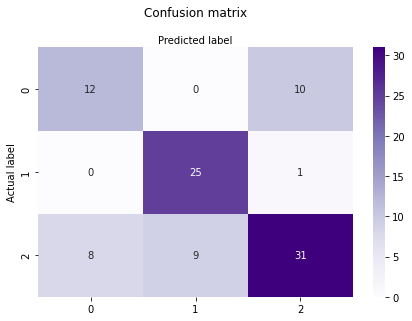

In [498]:
plt.figure(figsize=(16,16))
class_names=[0,1,2] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Purples" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [499]:
print (f'F1 score: {score * 100}')

F1 score: 70.10912698412697
